In [2]:
import sys,os
sys.path.append(os.getcwd())
from pymatgen.io.cif import CifParser,CifWriter
from pymatgen import Structure, Lattice, MPRester, Molecule
from pymatgen.analysis.adsorption import *
from pymatgen.core.surface import generate_all_slabs
from pymatgen.core.surface import  SlabGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from matplotlib import pyplot as plt
from pymatgen.core.lattice import Lattice
from ase import *
from pymatgen import *
from lmf import *
%matplotlib inline
parser = CifParser("structures/licoo2.cif")
structure = parser.get_structures()[0]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
structure
CifWriter(structure).write_file('licoo2_try.cif') 
os.system("open "+'licoo2_try.cif')

0

In [253]:
#a=structure.lattice.matrix
#a[2][2]=4
#struc=Structure(Lattice(a),structure.species,structure.cart_coords,coords_are_cartesian=True)
num_layers=9.5
slab=SlabGenerator(structure, (0,0,1),  min_slab_size=num_layers, min_vacuum_size=5,center_slab=False,in_unit_planes=True).get_slabs(bonds={("C", "O"): 2})[0]
CifWriter(slab).write_file('licoo2_new.cif') 
os.system("open "+'licoo2_new.cif')

0

In [10]:
species=[]
coords=[]
d=0
for i in structure:
    if i.species_string=="Li":
        species.append(i.species)
        coords.append(i.coords+[0,0,-.5*d])
    else:
        species.append(i.species)
        coords.append(i.coords)
a=structure.lattice.matrix.copy()
a[2][2]=a[2][2]+d
struc=Structure(Lattice(a),species,coords,coords_are_cartesian=True)       
CifWriter(struc).write_file('licoo2_'+str(struc.lattice.c)[:4]+'.cif') 
#os.system("open "+'licoo2_big.cif')
print(struc.lattice.c,structure.lattice.c)

4.992713124598566 4.992713124598566


0.0
0.0
0.03175063494000039
0.05291772490000066
0.09525190482000116
0.12700253976000156
0.22225444458000274


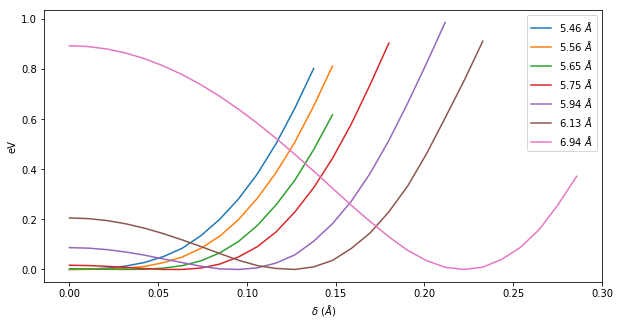

In [221]:

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,5))

a=np.loadtxt("Li_energy/5.46.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.46 $\AA$")


a=np.loadtxt("Li_energy/5.56.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.56 $\AA$")


a=np.loadtxt("Li_energy/5.65.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.65 $\AA$")


a=np.loadtxt("Li_energy/5.75.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.75 $\AA$")


a=np.loadtxt("Li_energy/5.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.94 $\AA$")

a=np.loadtxt("Li_energy/6.13.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.13 $\AA$")

a=np.loadtxt("Li_energy/6.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.94 $\AA$")


plt.xlabel("$\delta$ ($\AA$)")
plt.ylabel("eV")
plt.legend()
plt.show()


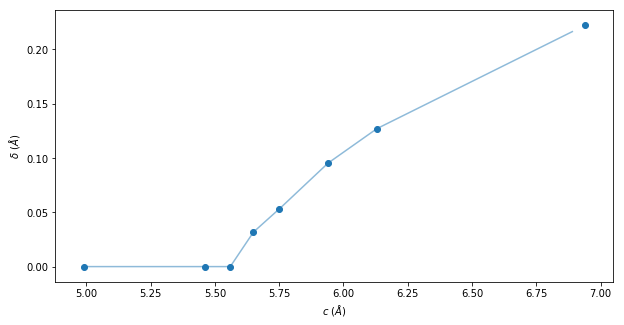

In [246]:
A=[4.99,5.46,5.56,5.65,5.75,5.94,6.13,6.94]
delta=[0,0,0,0.03175063494000039,
0.05291772490000066,
0.09525190482000116,
0.12700253976000156,
0.22225444458000274]
fig,ax=plt.subplots(1,1,figsize=(10,5))
from scipy import interpolate
f = interpolate.interp1d(A, delta)
x = np.arange(4.99, 6.9, 0.01)
y = f(x)
plt.plot(x,y,alpha=.5)
plt.scatter(A,delta)
plt.xlabel("$c$ ($\AA$)")
plt.ylabel("$\delta$ ($\AA$)")
plt.show()

In [20]:
parser = CifParser("nacoo2.cif")
structure = parser.get_structures()[0]
species=[]
coords=[]
d=1.2

for i in structure:
    if i.species_string=="Na":
        species.append(i.species)
        coords.append(i.coords+[0,0,-.5*d])
    else:
        species.append(i.species)
        coords.append(i.coords)
a=structure.lattice.matrix.copy()
a[2][2]=a[2][2]+d
struc=Structure(Lattice(a),species,coords,coords_are_cartesian=True)       
CifWriter(struc).write_file('nacoo2_big'+str(struc.lattice.c)[:4]+'.cif') 
#os.system("open "+'licoo2_big.cif')
print(struc.lattice.c,structure.lattice.c)

6.666506163601411 5.513863546854926


0.0
0.0
0.0
0.01058354498000013
0.05291772490000066
0.07408481486000092
0.09525190482000116


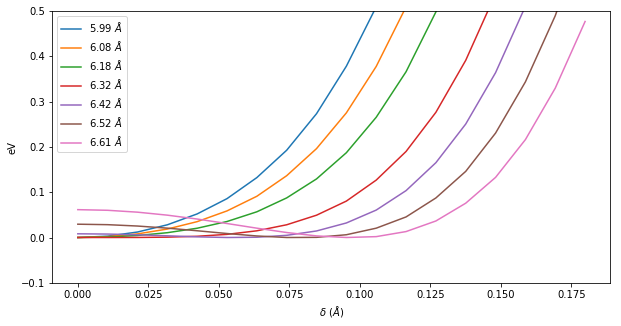

In [301]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,5))


A=[]
delta=[]
for i in [5.99,6.08,6.18,6.32,6.42,6.52,6.61]:
    d=i
    a=np.loadtxt("Na_energy/"+str(d)+".txt")
    x=a.T[0]/1.8897259885789
    y=(a.T[1]-np.min(a.T[1]))*13.6056980659
    print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
    plt.plot(x,y,label=str(d)+" $\AA$")
    A.append(d)
    delta.append(a.T[0][np.argmin(a.T[1])]/1.8897259885789)


plt.ylim([-.1,.5])
plt.xlabel("$\delta$ ($\AA$)")
plt.ylabel("eV")
plt.legend()
plt.show()

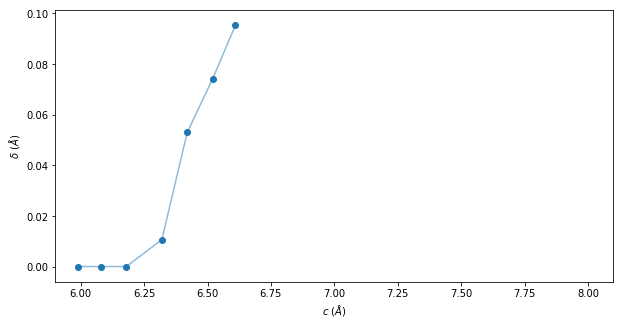

In [304]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
from scipy import interpolate
f = interpolate.interp1d(A, delta)
x = np.arange(np.min(A), np.max(A), 0.01)
y = f(x)
plt.plot(x,y,alpha=.5)
plt.scatter(A,delta)
plt.xlabel("$c$ ($\AA$)")
plt.ylabel("$\delta$ ($\AA$)")
plt.xlim([5.9,8.1])
plt.show()

0.0
0.0
0.03175063494000039
0.05291772490000066
0.09525190482000116
0.12700253976000156
0.22225444458000274


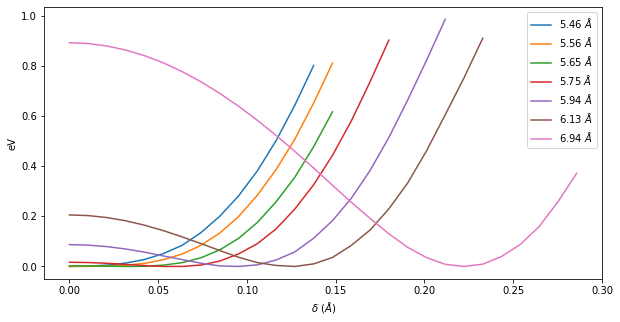

In [9]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,5))

a=np.loadtxt("Li_energy/5.46.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.46 $\AA$")


a=np.loadtxt("Li_energy/5.56.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.56 $\AA$")


a=np.loadtxt("Li_energy/5.65.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.65 $\AA$")


a=np.loadtxt("Li_energy/5.75.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.75 $\AA$")


a=np.loadtxt("Li_energy/5.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.94 $\AA$")

a=np.loadtxt("Li_energy/6.13.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.13 $\AA$")

a=np.loadtxt("Li_energy/6.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.94 $\AA$")


plt.xlabel("$\delta$ ($\AA$)")
plt.ylabel("eV")
plt.legend()
plt.show()

In [17]:
d=["5.46","5.56","5.65","5.75","5.94","6.13","6.94"]
x=[]
y=[]
z=[]
for i in d:
    a=np.loadtxt("Li_energy/"+str(i)+".txt")
    x.append(a.T[0]/1.8897259885789)
    z.append((a.T[1]-np.min(a.T[1]))*13.6056980659)
    y.append(np.ones(len(a.T[0]))*float(i))
x=np.concatenate(x).ravel()
y=np.concatenate(y).ravel()
z=np.concatenate(z).ravel()

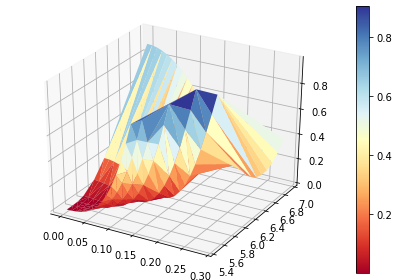

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
surf = ax.plot_trisurf(x,y,z, cmap="RdYlBu", linewidth=0)
fig.colorbar(surf)
fig.tight_layout()
plt.show()

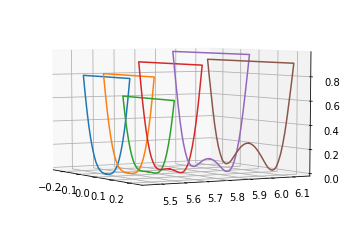

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
d=["5.46","5.56","5.65","5.75","5.94","6.13"]
x=[]
y=[]
z=[]
for i in d:
    a=np.loadtxt("Li_energy/"+str(i)+".txt")
    x=a.T[0]/1.8897259885789
    z=(a.T[1]-np.min(a.T[1]))*13.6056980659
    y=np.ones(2*len(a.T[0]))*float(i)
    xrev=[-1*j for j in x]
    x=np.hstack([x,xrev[::-1]])
    z=np.hstack([z,z[::-1]])
    ax.plot(x,y,z)
ax.view_init(elev=5., azim=-30)
#ax.set_zlim(0,.4)
ax = fig.gca(projection = '3d')
ax.pbaspect = [1.0, 9, 3.25]
plt.show()


In [4]:
def get_data(fname="output"):
    with open(fname, 'r') as f:
        data = f.read()
    return data

In [12]:

from dotmap import DotMap
def get_lines(data,key,num_lines=0,return_index=False):
    '''
    get the num_lines along with line matching "key" in data text
    if return_index returns the index
    
    '''
    index=[i for i, s in enumerate(data.splitlines()) if key in s]
    values=[data.splitlines()[i:i+num_lines+1] for i in index]
    index_vals=[list(range(i,i+num_lines+1)) for i in index]
    values=[list(filter(lambda name: name.strip(), i)) for i in values]
    if return_index: 
        return values,index_vals
    else: 
        return values
def get_nbas(data):
    ''' Extract number of atoms
    '''
    try:
        nbas=int(get_lines(data,"nbas")[0][0].partition('nbas = ')[2].split()[0])
    except ValueError:
        print("unable to fing number of atoms")
    return nbas
def get_iter(data):
    '''returns total num of iterations'''
    return int(get_lines(data,"iteration",return_index=False)[-1][0].split("iteration ")[-1].split()[0])
def get_species(data):
    '''return species type for all atoms present'''
    natoms=get_nbas(data)
    return [''.join(i[0].split()[-1].split(':')[::-1]).lower() for i in get_lines(data,"   species  ")[:natoms]]

In [13]:
def make_iterations(data):
    '''make an iteration object to hold information'''
    iterations=[]
    for i in range(get_iter(data)):
        dummy=DotMap()
        dummy.niter=i
        iterations.append(dummy)
    return iterations

def get_charges(data,iterations=None):
    '''get charge data for each iterations'''
    if iterations==None:
        iterations=make_iterations(data)
    for j in range(len(iterations)):
        iter_i=iterations[j].niter
        key="charges:       old"
        natoms=get_nbas(data)
        iter_data_txt=get_lines(data,key,natoms+1,return_index=False)[iter_i]
        natoms=get_nbas(data)
        species=get_species(data)
        iteration_charge_data=DotMap()
        charge=DotMap()
        niter=get_iter(data)
        for i in range(natoms+1):
            line_data=iter_data_txt[1:][i].split()
            if i==0:
                name="smooth"
                tmp=0
            else:name=species[i-1];tmp=1
            iteration_charge_data[name].old_charge=float(line_data[tmp+1])
            iteration_charge_data[name].new_charge=float(line_data[tmp+2])
            iteration_charge_data[name].screened_charge=float(line_data[tmp+3])
            iteration_charge_data[name].rms_charge=float(line_data[tmp+4])
            iteration_charge_data[name].diff_charge=float(line_data[tmp+5])
            iteration_charge_data[name].charge=float(line_data[tmp+2])
        iterations[j].charge=iteration_charge_data
    return iterations
iteration_data=get_charges(data)

NameError: name 'data' is not defined

In [25]:
%load_ext autoreload
%autoreload 2
from questaal_reader import *
#%%timeit
output=reader("out")
output.structure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
output.structure[0].

4.717744

In [269]:
for i in data.atoms:
    print(data.iterations[-1].charge[i].charge)
print("----------------")
print(data.structure)
print("----------------")
for i in range(data.niter):
    print(data.iterations[i].energy)
print("----------------")
print(data.energy)
print("----------------")
print(data.conduction_band_min-data.valance_band_max)
print("----------------")
print(data.gap)

4.717703
-0.005306
1.226535
1.226535
----------------
Full Formula (Na1 Co1 O2)
Reduced Formula: NaCoO2
abc   :   2.919871   2.919870   5.800222
angles:  75.421668  75.421666  59.999988
Sites (4)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Co    0.50901   0.50901   0.47297
  1  Na    0.00901   0.00901   0.97297
  2  O     0.782508  0.782508  0.652475
  3  O     0.235512  0.235512  0.293465
----------------
-46326.67385339705
----------------
-46326.67385339705
----------------
0.6705686713852622
----------------
0.67028


In [245]:
def get_data(fname="output"):
	with open(fname, 'r') as f:
		data = f.read()
	return data 

In [5]:
def get_lines(data,key,num_lines=0,return_index=False):
	'''
	get the num_lines along with line matching "key" in data text
	if return_index returns the index
	'''
	index=[i for i, s in enumerate(data.splitlines()) if key in s]
	values=[data.splitlines()[i:i+num_lines+1] for i in index]
	index_vals=[list(range(i,i+num_lines+1)) for i in index]
	values=[list(filter(lambda name: name.strip(), i)) for i in values]
	# if return_index: 
	#   return values,index_vals
	# else: 
	return values
data=get_data()

In [234]:
def get_energy(data):
    '''gets the energy at each iteration'''
    ehf=[i[0].split()[2].split("=")[-1] for i in get_lines(data," nit=")]
    ehk=[i[0].split()[3].split("=")[-1] for i in get_lines(data," nit=")]
    ehf=np.array(ehf).astype(np.float)
    ehk=np.array(ehk).astype(np.float)
    return ehf,ehk

In [236]:
def make_iterations(data):
	'''
	make an iteration object to hold information
	'''
	iterations=[]
	for i in range(get_iter(data)):
		dummy=DotMap()
		dummy.niter=i
		iterations.append(dummy)
	return iterations
iterations=make_iterations(data)

In [ ]:
def set_iteration_energy(iterations):
    '''set energy to iteration object'''
    ehf,ehk=get_energy(data)
    for j in range(len(iterations)):
        iterations[j].ehf=ehf[j]
        iterations[j].ehk=ehf[j]

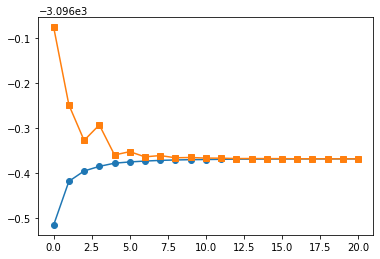

In [235]:
import matplotlib.pyplot as plt
ehf,ehk=get_energy(data)
plt.plot(ehf,marker="o")
plt.plot(ehk,marker="s")

In [256]:
def get_band_data(data):
    '''get band gap data'''
    vals=[[i[0].split()[2],i[0].split()[5],i[0].split()[11]] for i in get_lines(data,"gap")]
    vals=np.array(vals).astype(float)
    valance_band_max=vals.T[0]
    conduction_band_min=vals.T[1]
    gap=vals.T[2]
    return valance_band_max,conduction_band_min,gap

In [253]:
def set_band_data(data,iterations):
    valance_band_max,conduction_band_min,gap=get_band_data(data)
    for i in range(len(iterations)):
        iterations[i].valance_band_max=valance_band_max[i]
        iterations[i].conduction_band_min=conduction_band_min[i]
        iterations[i].gap=gap[i]

[' VBmax = 0.036783  CBmin = 0.128275  gap = 0.091492 Ry = 1.24429 eV']

In [30]:
output.structure.energy=4

{'@module': 'pymatgen.core.structure',
 '@class': 'Structure',
 'charge': 14.834497,
 'lattice': {'matrix': [[2.919871469910529, 0.0, 0.0],
   [1.4599357349552644, 2.528681689729266, 0.0],
   [1.4599357349552644, 0.8428938965764219, 5.54983766118805]],
  'a': 2.919871469910529,
  'b': 2.919870448867796,
  'c': 5.800222455787916,
  'alpha': 75.42166797019799,
  'beta': 75.42166623326567,
  'gamma': 59.999988432423876,
  'volume': 40.976813032379845},
 'sites': [{'species': [{'element': 'Co', 'occu': 1}],
   'abc': [0.50901, 0.50901, 0.47297],
   'xyz': [2.9198714699105284, 1.6857877931528438, 2.624906718612112],
   'label': 'Co',
   'properties': {'charge': 4.717744}},
  {'species': [{'element': 'Na', 'occu': 1}],
   'abc': [0.00901, 0.00901, 0.97297],
   'xyz': [1.4599357349552644, 0.8428938965764219, 5.399825549206137],
   'label': 'Na',
   'properties': {'charge': -0.005329}},
  {'species': [{'element': 'O', 'occu': 1}],
   'abc': [0.782508, 0.782508, 0.652475],
   'xyz': [4.37980574

In [ ]:
import os
import os.path
from questaal_reader import *
import subprocess
import pickle 
from tqdm import tqdm

def runcmd(exe, opt=""):
        p = subprocess.Popen([exe, opt],
                             stdout=subprocess.PIPE,
                             stderr=subprocess.PIPE,
                             shell=True)
        out, err = p.communicate()
        return out.decode('utf-8'), err.decode('utf-8')


path=[]

rootdir = os.getcwd()

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep
        if file.endswith("output"):
            path.append(filepath)




home=os.getcwd()
for i in tqdm(path):
        os.chdir(i)
        print("running in "+i+"\n--------------\n\n")
        out, err=runcmd("mpirun -np 13 lmf -vnit=1 --pr51 --nosym temp>out")
        os.chdir(home)

data=[]
for i in path:
    os.chdir(i)
    fname=i+"/out"
    output=reader(fname)
    data.append(output)
    os.chdir(home)
    
with open('data', 'w') as f:
    pickle.dump(data,f)
    
print("done")
        

In [92]:
import pickle

In [97]:
licoo2=pickle.load(open( "licoo2/data", "rb" ))

In [241]:
energy=[i.energy for i in licoo2]
licharge=[i.structure[1].charge for i in licoo2]
cocharge=[i.structure[0].charge for i in licoo2]
o1charge=[i.structure[2].charge for i in licoo2]
o2charge=[i.structure[3].charge for i in licoo2]
smoothcharge=[i.structure.charge for i in licoo2]
distance=[i.structure.get_distance(0,1) for i in licoo2]
c=[i.structure.lattice.c for i in licoo2]
# for i in licoo2:
#     if i.energy in en:
#         print(i.energy)

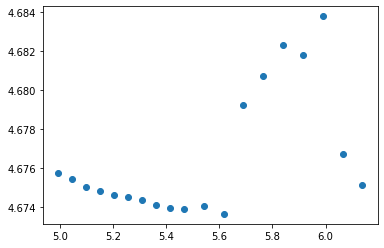

In [242]:
import pandas as pd
from scipy.optimize import curve_fit
def phase(x, a, b):
    return a * x ** 2 + b * x ** 4

data = {"c": c, "distance": distance, "energy": energy, "li":licharge,"co":cocharge,"o1":o1charge,"o2":o2charge,"smooth":smoothcharge}
df = pd.DataFrame(data)
df["li"][df["li"]<0.0]=0
df=df.sort_values(['c', 'distance'])
lie=[]
coe=[]
o1e=[]
o2e=[]
en=[]
d=[]
keys=[]
for key, grp in df.groupby(["c"]):
    d.append(-grp.distance[grp.energy==grp.energy.min()].values+grp.distance.max())
    en.append(grp.energy.min())
    lie.append(grp.li[grp.energy==grp.energy.min()].values)
    coe.append(grp.co[grp.energy==grp.energy.min()].values)
    o1e.append(grp.o1[grp.energy==grp.energy.min()].values)
    keys.append(key)
for e in [lie]:
    e=np.array(e)
    e[e<=0]=0
plt.scatter(keys,coe)

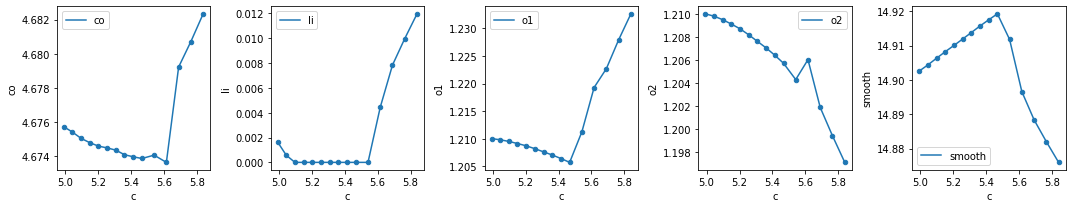

In [244]:
plots=["co","li","o1","o2","smooth"]
fig,ax=plt.subplots(1,len(plots),figsize=(15,3))
for j,i in enumerate(plots):
    df.sort_values("energy").groupby('c', as_index=False).first()[:-4].plot.scatter(x="c",y=i,ax=ax[j])
    df.sort_values("energy").groupby('c', as_index=False).first()[:-4].plot(x="c",y=i,ax=ax[j])
    
plt.tight_layout()

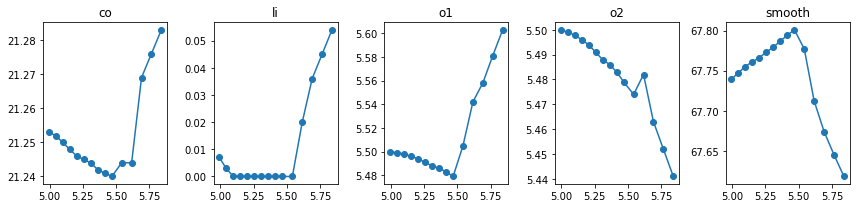

In [245]:
df1=df.sort_values("energy").groupby('c', as_index=False).first()[:-4][plots]
cx=df.sort_values("energy").groupby('c', as_index=False).first()[:-4].c.values
df1=df1.div(df1.sum(axis=1), axis=0).mul(100).round(3)
#plots=["co","li","o1","o2"]
fig,ax=plt.subplots(1,len(plots),figsize=(12,3))
for j,i in enumerate(plots):
    ax[j].scatter(cx,df1[i])
    ax[j].plot(cx,df1[i])
    ax[j].set_title(i)
plt.tight_layout()

In [254]:
licoo2[-1].structure.get_distance(1,3)

2.3045947650269927

In [296]:
import pickle
licoo2=pickle.load(open( "licoo2/data", "rb" ))
energy=[i.energy for i in licoo2]
licharge=[i.structure[1].charge for i in licoo2]
cocharge=[i.structure[0].charge for i in licoo2]
o1charge=[i.structure[2].charge for i in licoo2]
o2charge=[i.structure[3].charge for i in licoo2]
smoothcharge=[i.structure.charge for i in licoo2]
distance=[i.structure.get_distance(0,1) for i in licoo2]
c=[i.structure.lattice.c for i in licoo2]
data = {"c": c, "distance": distance, "energy": energy, "li":licharge,"co":cocharge,"o1":o1charge,"o2":o2charge,"smooth":smoothcharge}
df = pd.DataFrame(data)
needed_energy=df.sort_values("energy").groupby('c', as_index=False).first().energy.values
structures=[i for i in licoo2 if (i.energy in needed_energy) ]
structures=sorted(structures, key=lambda k: k.energy) 

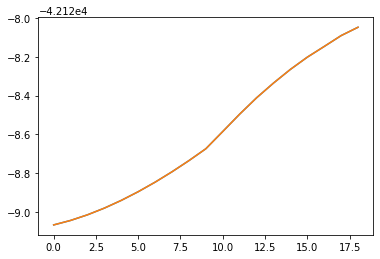

In [297]:
plt.plot(needed_energy)
plt.plot([i.energy for i in structures ])

In [298]:
pickle.dump(structures, open("licoo2/min_structures_licoo2", "wb"))

In [299]:
pickle.load(open("licoo2/min_structures_licoo2", "rb"))[0].energy

-42129.065483180515

In [286]:
import pymatgen.io.ase as pase
pase.AseAtomsAdaptor().get_atoms(structures[0].structure)

Atoms(symbols='CoLiO2', pbc=True, cell=[[2.84290158068898, 0.0, 0.0], [1.42145079034449, 2.462023841416174, 0.0], [1.42145079034449, 0.8206746138053914, 4.715205289813355]])

In [301]:
structures=pickle.load(open("licoo2/min_structures_licoo2", "rb"))
for i in structures:
    fname=str(np.round(i.structure.lattice.c,3))
    print('Energy for {} = '.format(fname), 'eV')

Energy for 4.993 =  eV
Energy for 5.045 =  eV
Energy for 5.098 =  eV
Energy for 5.15 =  eV
Energy for 5.203 =  eV
Energy for 5.256 =  eV
Energy for 5.309 =  eV
Energy for 5.362 =  eV
Energy for 5.414 =  eV
Energy for 5.467 =  eV
Energy for 5.542 =  eV
Energy for 5.616 =  eV
Energy for 5.69 =  eV
Energy for 5.765 =  eV
Energy for 5.84 =  eV
Energy for 5.914 =  eV
Energy for 5.989 =  eV
Energy for 6.064 =  eV
Energy for 6.139 =  eV


In [404]:
mpi="mpirun -np 1 lmf -vnit=0 --rs=1,0 --wden~3d~core=2 -vgmax=42 temp"
mpi.split()

['mpirun',
 '-np',
 '1',
 'lmf',
 '-vnit=0',
 '--rs=1,0',
 '--wden~3d~core=2',
 '-vgmax=42',
 'temp']

In [398]:
acf


['    #         X           Y           Z       CHARGE      MIN DIST   ATOMIC VOL',
 ' --------------------------------------------------------------------------------',
 '    1    5.372302    3.101702    4.455218    7.566730     1.426912    48.532766',
 '    2    0.000000    0.000000    0.000000    0.017982     0.504505     1.335987',
 '    3    8.058453    4.652543    6.404470    7.207710     1.878778    86.423460',
 '    4    2.686151    1.550841    2.505966    7.207738     1.878858    86.425330',
 ' --------------------------------------------------------------------------------',
 '    VACUUM CHARGE:               0.0000',
 '    VACUUM VOLUME:               0.0000',
 '    NUMBER OF ELECTRONS:        22.0002']

In [403]:
print(charge)

[7.56673, 0.017982, 7.20771, 7.207738]


In [415]:
t=structures[0].structure.copy()
for i,j in enumerate(t):
    j.charge=charge[i]
    print(j.charge)

7.56673
0.017982
7.20771
7.207738


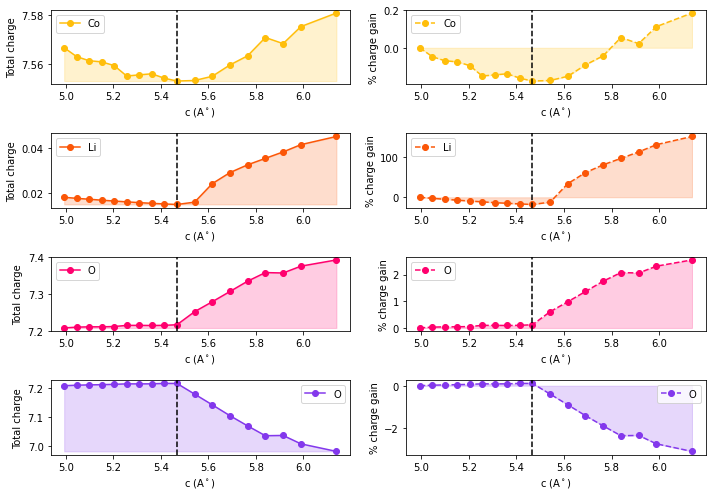

In [557]:
structures=pickle.load(open("licoo2/charge_data", "rb"))
fig,ax1=plt.subplots(len(structures[0]),2,figsize=(10,7))
n=0
structures.remove(structures[-2])
colors=["#ffbe0b","#fb5607","#ff006e","#8338ec"]
charges=[]
ax=ax1[:,0]
for j in range(len(structures[0])):
    mul=0
    if j==1:
        mul=np.concatenate(([0]*9,np.linspace(0,.02,9)))
    if j==2:
        mul=-1*np.concatenate(([0]*9,np.linspace(0,.02,9)))
    charge=np.array([i[j].charge for i in structures])+mul
    charges.append(charge)
    c=[i.lattice.c for i in structures]
    ax[j].plot(c,charge,marker="o",label= structures[0][j].species_string,color=colors[j])
    ax[j].fill_between(c,charge,charge.min(),color=colors[j],alpha=0.2)
    ax[j].axvline(c[9],c="k",ls="--")
    ax[j].legend()
    ax[j].set_ylabel("Total charge")
    ax[j].set_xlabel("c (A$^\circ$)")
charges=np.array(charges)
percent=[(charges[i]-charges[i][0])*100/charges[i][0] for i in range(charges.shape[0])]
percent=np.array(percent)
ax=ax1[:,1]
for j in range(len(structures[0])):
    ax[j].plot(c,percent[j],marker="o",label= structures[0][j].species_string,color=colors[j],ls="--")
    ax[j].fill_between(c,percent[j],0,color=colors[j],alpha=0.2)
    ax[j].axvline(c[9],c="k",ls="--")
    ax[j].legend()
    ax[j].set_ylabel("% charge gain")
    ax[j].set_xlabel("c (A$^\circ$)")

plt.tight_layout()

In [518]:
charges=np.array(charges)
percent=[charges[i]*100/charges.sum(axis=0)[i] for i in range(charges.shape[0])]
percent=np.array(percent)

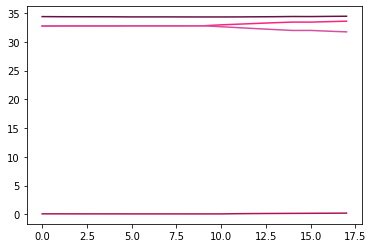

In [524]:
for i in percent:
    plt.plot(i)

In [543]:
charges=np.array(charges)
percent=[(charges[i]-charges[i][0])*100/charges[i][0] for i in range(charges.shape[0])]
percent=np.array(percent)

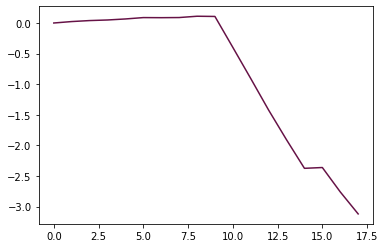

In [547]:
plt.plot(percent[3])